##### Isolation Forest Works best on high-dimensional data.

##### Dataset is KDDCUP 1999, which contains an extensive amount of data representing a wide variety of intrusion attacks.

In [1]:
import numpy as np                   
import pandas as pd             
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
'''
numpy - Performs High-Level Computations.
pandas - Help read data files of various formats and help store them as data frame objects.
scikit-learn - Package that allows us to apply various ML Algoriths to different datasets and provides tools for Data Analysis.
%matpltlib inline - Allows graphs to be displayed below a cell and to be saved alongside Notebook.
'''

'\nnumpy - Performs High-Level Computations.\npandas - Help read data files of various formats and help store them as data frame objects.\nscikit-learn - Package that allows us to apply various ML Algoriths to different datasets and provides tools for Data Analysis.\n%matpltlib inline - Allows graphs to be displayed below a cell and to be saved alongside Notebook.\n'

In [3]:
df = pd.read_csv('C:/Users/Adhish/Downloads/s171HbTsJmNQ', index_col=None)

In [4]:
df.head()

,0,tcp,http,SF,215,45076,0.1,0.2,0.3,0.4,...,0.17,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,0.00.13,normal.
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", 
           "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
           "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
           "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [6]:
df.columns = columns

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
df.shape

(4898430, 42)

##### Filter out the entire data frame to only include data entries that involve an HTTP attack, then drop the 'Service' column. 

In [9]:
df = df[df['service'] == 'http']

In [10]:
df.drop('service', axis=1)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,SF,238,1282,0,0,0,0,0,...,5,1.0,0.0,0.20,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898425,0,tcp,SF,212,2288,0,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898426,0,tcp,SF,219,236,0,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,SF,218,3610,0,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,SF,219,1234,0,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [11]:
df['label'].value_counts()

normal.       619045
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: label, dtype: int64

##### The vast majority of the data set is comprised of normal data entries, with around 0.649% of data entries for all HTTP attacks comprising actual intrusion attacks.



##### To convert Categorical Data Values into values suitable for training the model, we are using the built in function LabelEncoder

##### To resolve this issue, the label encoder takes the unique (meaning one entry per categorical value instead of multiple) list of categorical values and assigns a number representing each of them. 



In [12]:
for col in df.columns:
    
    if  df[col].dtype == 'object':
        
        encoded = LabelEncoder()
        
        encoded.fit(df[col])
        
        df[col] = encoded.transform(df[col])

In [13]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,0,9,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,4
1,0,0,0,9,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,4
2,0,0,0,9,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,4
3,0,0,0,9,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,4
4,0,0,0,9,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,4


In [14]:
for f in range(0, 3): 
    
    df = df.iloc[np.random.permutation(len(df))] # Randomly Shuffling all the entries in the data set to avoid the problem of abnormal entries pooling in any one region of the data set. 
                                                 
                                                 # The range(0, 3) determines how many times we are Randomly Shuffling, 0 - 3 means Thrice.

    
df2 = df[:500000] # Assigning the first 500,000 entries of df to a variable df2.

labels = df2['label'] # Assign the 'Label' column to the variable 'labels'

df_validate = df[500000:] # Assign the rest of the data frame to a variable named df_validate to create the validation data set

x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.2, random_state = 42)

'''The parameters are as follows: x, y, test_size, and random_state. Note that x and y are supposed to be the training data and training labels, 
respectively, with test_size indicating the percentage of the data set to be used as test data.'''

x_val, y_val = df_validate, df_validate['label']

Training Data : The data that the model trains and learns on. For an isolation forest, this set is what the model partitions on.

Testing Data : The data that is used to test the model’s performance.

Validation Data : It is used during training to gauge how the model’s training is going. It basically helps ensure that as the model gets better at performing the task on the training data, it also gets better at performing the same task over new, but similar data. This way, the model doesn’t only get really good at performing the task on the training data, but can perform similarly on new data as well. In other words, it helps avoid Overfitting.

In [15]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))

print("Shapes:\nx_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))

print("Shapes:\nx_val:%s\ny_val:%s\n" % (x_val.shape, y_val.shape))

Shapes:
x_train:(400000, 42)
y_train:(400000,)

Shapes:
x_test:(100000, 42)
y_test:(100000,)

Shapes:
x_val:(123090, 42)
y_val:(123090,)



# Building the Model

In [16]:
isolation_forest = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1, random_state=42)

# Here’s an explanation of the parameters: 
1. n_estimators:  The number of trees to use in the forest. The default is 100. 

2. max_samples: the maximum number of data points that the tree should build on. The default is whatever is smaller: 256 or the number of samples in the data set. 

3. contamination: An estimate of the percentage of the entire data set that should be considered an anomaly/outlier. It is 0.1 by default. 

4. random_state: The number it will initialize the random number generator with to use during the training process. An isolation forest utilizes the random number generator quite extensively during the training process.



In [17]:
isolation_forest.fit(x_train)

IsolationForest(contamination=0.1, max_samples=256, random_state=42)

In [18]:
anomaly_scores = isolation_forest.decision_function(x_val)

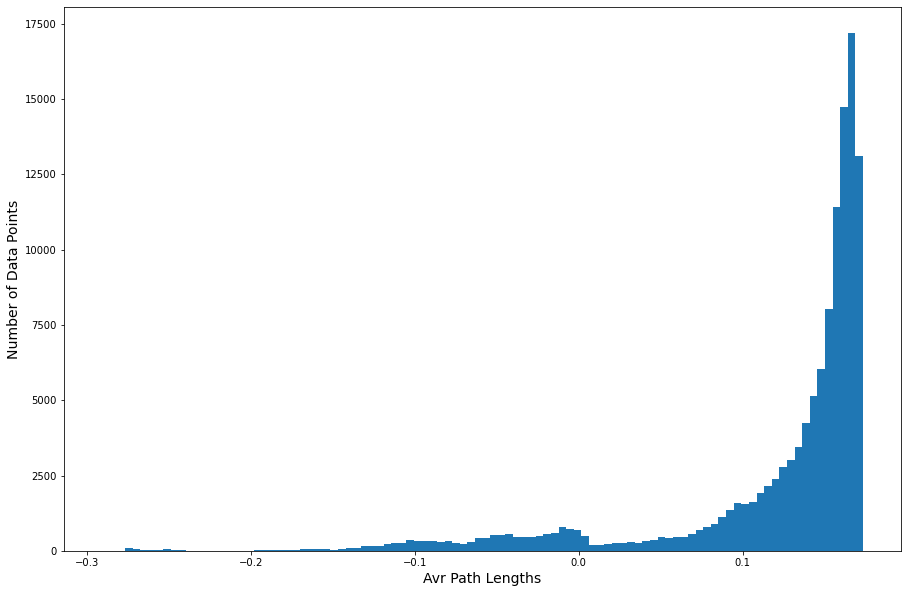

In [19]:
plt.figure(figsize = (15, 10))

plt.hist(anomaly_scores, bins=100)

plt.xlabel('Avr Path Lengths', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

##### Let’s calculate the AUC to see how well the model did. Looking at the graph, there appears to be a few anomalous data with average path of less than -0.15. You expect there to be a few outliers within the normal range of data,so let’s pick something more extreme, such as -0.19.

### Note: The lesser the path length, the more likely the data is to be anomalous, hence why there’s a curve that increases drastically as the graph goes right.

##### Classifying anomalies based on a threshold that we picked from a graph and generating the AUC score from that set of labels for each point.


In [20]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19

matches = y_val == list(encoded.classes_).index('normal.')

auc = roc_auc_score(anomalies, matches)

print('AUC: {:.2F}'.format(auc))

AUC: 0.96


### Anomaly Scores for the Test Data

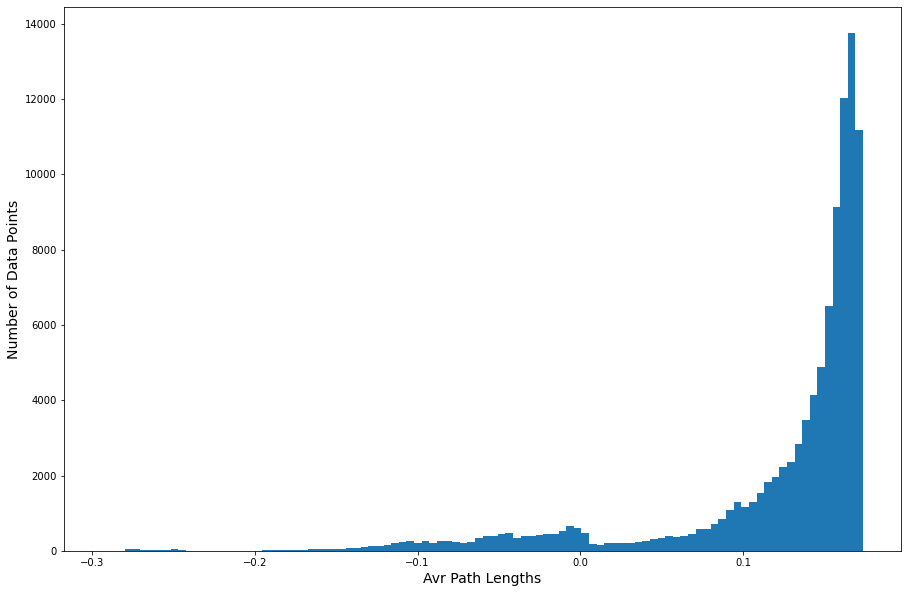

In [21]:
anomaly_scores_test = isolation_forest.decision_function(x_test)

plt.figure(figsize = (15, 10))

plt.hist(anomaly_scores_test, bins=100)

plt.xlabel('Avr Path Lengths', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

In [22]:
anomalies_test = anomaly_scores_test > -0.19

matches = y_test == list(encoded.classes_).index('normal.')

auc = roc_auc_score(anomalies_test, matches)

print('AUC: {:.2%}'.format(auc))

AUC: 95.96%


##### An Isolation Forest works well for multidimensional data (in this case, you had 41 columns after dropping the service column) and can be used for unsupervised anomaly detection when applied in the manner implemented above.

